In [60]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [61]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [62]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())


In [63]:
train_dataset = tf.data.Dataset.from_tensor_slices((training_sentences, training_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((testing_sentences, testing_labels))

In [64]:
BUFFER_SIZE = 20000
BATCH_SIZE = 512

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [65]:
VOCAB_SIZE = 5000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens = VOCAB_SIZE, standardize = 'lower_and_strip_punctuation',
    output_mode = 'int', output_sequence_length = 200,
)

In [66]:
encoder.adapt(train_dataset.map(lambda text, label: text))

In [67]:
vocab = np.array(encoder.get_vocabulary())

In [68]:
from tensorflow.keras.layers import Bidirectional,LSTM, Dense, Embedding, Dropout, GlobalAveragePooling1D

In [69]:
model = tf.keras.Sequential([
    encoder,
    Embedding(input_dim=len(encoder.get_vocabulary()), output_dim= 256, mask_zero=True),
    GlobalAveragePooling1D(),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')])

In [70]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits= False), metrics = ['accuracy']
              )

In [71]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=5)

Epoch 1/10
49/49 [==============================] - 6s 113ms/step - loss: 0.6418 - accuracy: 0.6808 - val_loss: 0.5208 - val_accuracy: 0.7977
Epoch 2/10
49/49 [==============================] - 5s 108ms/step - loss: 0.4022 - accuracy: 0.8339 - val_loss: 0.3485 - val_accuracy: 0.8508
Epoch 3/10
49/49 [==============================] - 5s 108ms/step - loss: 0.2981 - accuracy: 0.8766 - val_loss: 0.3259 - val_accuracy: 0.8676
Epoch 4/10
49/49 [==============================] - 5s 108ms/step - loss: 0.2618 - accuracy: 0.8935 - val_loss: 0.3243 - val_accuracy: 0.8637
Epoch 5/10
49/49 [==============================] - 5s 108ms/step - loss: 0.2372 - accuracy: 0.9043 - val_loss: 0.3312 - val_accuracy: 0.8590
Epoch 6/10
49/49 [==============================] - 5s 109ms/step - loss: 0.2248 - accuracy: 0.9098 - val_loss: 0.3402 - val_accuracy: 0.8578
Epoch 7/10
49/49 [==============================] - 5s 108ms/step - loss: 0.2129 - accuracy: 0.9148 - val_loss: 0.3541 - val_accuracy: 0.8559
Epoch 

In [72]:
loss, accuracy = model.evaluate(test_dataset)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

49/49 [==============================] - 3s 64ms/step - loss: 0.4062 - accuracy: 0.8400
Loss:  0.4062362611293793
Accuracy:  0.8400400280952454


In [73]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [74]:
import matplotlib.pyplot as plt

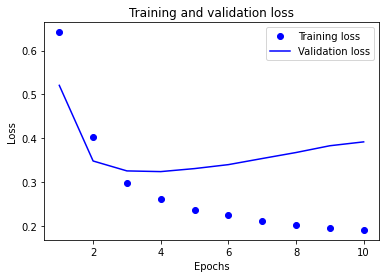

In [75]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

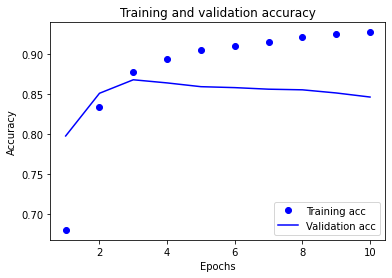

In [76]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [77]:

example = ['IT was just a amazing movie with brilliant performances']

In [78]:
model.predict(example)

array([[1.]], dtype=float32)

In [79]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:

model.save('tf_keras')

INFO:tensorflow:Assets written to: tf_keras/assets


INFO:tensorflow:Assets written to: tf_keras/assets


In [81]:
exported_model = tf.keras.models.load_model('tf_keras/')

In [82]:
exported_model.predict(['IT was just a amazing movie with brilliant performances'])

array([[1.]], dtype=float32)

In [83]:
import requests